# さまざまな計算方法

微分でも積分でも起こりうることがあります。それはそのままだと「計算しづらい」もしくは「計算できない」といった問題です。

これについてはさまざまな方法で回避するテクニックがあります。その中でも変数変換および媒介変数を使った計算です。

機械学習でもよく使われるため、簡単に抑えておきます。ただし、それほどプログラマブルな要素ではないため、軽く目を通してみてください。
いやになったら後で見返してください。


## 微分

### 関数の積の微分

$f(x) = x^2 + 1, g(x) = x^2 + 3x + 1$　のような関数があったときに、2つの関数の積 $f(x)g(x) = (x^2 + 1)(x^2 + 3x + 1)$のように新たな関数を作れます。
このような関数の積の微分は

$$
\begin{aligned}
f(x)g(x) &= (x^2 + 1)(x^2 + 3x + 1)\\
         &= x^2(x^2 + 3x +1) + (x^2 + 3x + 1)\\
         &= x^4 + 3x^3 + x^2  + x^2 + 3x + 1\\
         &= x^4 + 3x^3 + 2x^2 + 3x + 1
\end{aligned}
$$
のように展開してから微分もできますが、関数によってはこのように分解できない場合が多いです。このときに次のように微分ができます。

#### 定理: 関数の積の微分

$$(f(x)g(x))' = f'(x)g(x) + f(x)g'(x)$$

$f(x)g(x)$の$f(x)$を微分したものと$g(x)$ を微分したものをかけ、次に$f(x)$ と $g(x)$を微分したものをかけ、それぞれを足すと計算できます。上の例であれば、

$$
\begin{aligned}
(f(x)g(x))' &= ((x^2 + 1)(x^2 + 3x + 1))'\\
            &= (x^2+1)'(x^2 + 3x + 1) + (x^2 + 1)(x^2 + 3x + 1)'\\
            &= 2x(x^2 + 3x + 1) + (x^2 + 1)(2x + 3)\\
            &= 2x^3 + 6x^2 + 2x + 2x^3 + 3x^2 + 2x + 3\\
            &= 4x^3 + 9x^2 + 4x + 3
\end{aligned}
$$

となります。上で展開したものを微分すれば同じになることが確認できます。

Juliaでも確認してみましょう。






In [3]:
# SymPyをインストール
using Pkg
Pkg.add("SymPy")
Pkg.build("PyCall")

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.7/Project.toml`
  No Changes to `~/.julia/environments/v1.7/Manifest.toml`
    Building Conda ─→ `~/.julia/scratchspaces/44cfe95a-1eb2-52ea-b672-e2afdf69b78f/6e47d11ea2776bc5627421d59cdcc1296c058071/build.log`
    Building PyCall → `~/.julia/scratchspaces/44cfe95a-1eb2-52ea-b672-e2afdf69b78f/1fc929f47d7c151c839c5fc1375929766fb8edcc/build.log`


In [16]:
using SymPy

# 微分する変数を指定
x=symbols("x")

h = (x^2 + 1)*(x^2 +3x + 1)

# 微分して（）を展開
sympy.expand(h.diff(x))


   3      2          
4⋅x  + 9⋅x  + 4⋅x + 3

### 関数の商の微分

関数$f(x),g(x)$に対して、$g(x) \neq 0$ のときに

$$\frac{f(x)}{g(x)}$$

を考えられます。この関数の微分は以下のように計算できます。

#### 定理: 関数の商の微分

$$ \Bigg(\frac{f(x)}{g(x)} \Bigg)' = \frac{f(x)'g(x) - f(x)g(x)'}{ g^2(x)} $$

関数の積の微分よりだいぶ複雑ですね。分母は$g(x)$を2乗しています。分子は関数の積の微分の2つ目の項が$-$になっています。

計算してみましょう。　$f(x) = x^2 +1, g(x) = x^2 - 2x + 3$とします。確認のために$g(x)$をグラフにしてみましょう。

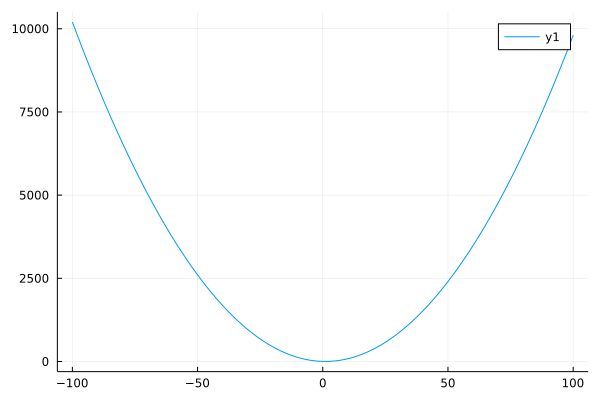

In [20]:
using Plots

g = x -> x^2 - 2x + 3
plot(g, -100:100)

$-100 \leq x \leq 100$の区間しか表示できていませんが、最小値が0をうわまわっていることがわかります。つまり$g(x)$はすべての$x$について$g(x) \neq 0$ です。
商を考えるときは分母が0とならないか、注意が必要です。もし0になる場合が会ったとしても、0になる点を除いた区間を対象にすれば商を考えられます。

さて、微分してみましょう。


$$
\begin{aligned}
\Bigg(\frac{f(x)}{g(x)}\Bigg)' &= \Bigg(\frac{x^2 + 1}{ x^2 - 2x + 3}\Bigg)'\\
                  &= \frac{(x^2 + 1)'(x^2 - 2x + 3) - (x^2 + 1)(x^2 - 2x + 3)' }{ (x^2 - 2x + 3)^2 }\\
                  &= \frac{(2x(x^2 - 2x + 3) - (x^2 + 1)(2x -2) }{ (x^2 - 2x + 3)^2 }\\                  
                  &= \frac{((2x^3 - 4x^2 + 6x) - (2x^3 - 2x^2 + 2x -2) }{ (x^2 - 2x + 3)^2 }\\                  
                  &= \frac{-2x^2 + 4x  + 2}{ (x^2 - 2x + 3)^2 }
\end{aligned}
$$


Julia でも確認してみましょう。

In [31]:
using SymPy

x = symbols("x")
h = (x^2 + 1)/(x^2 - 2x + 3)

h.diff(x)

                         ⎛ 2    ⎞
    2⋅x        (2 - 2⋅x)⋅⎝x  + 1⎠
──────────── + ──────────────────
 2                            2  
x  - 2⋅x + 3    ⎛ 2          ⎞   
                ⎝x  - 2⋅x + 3⎠   

Juliaだと更に分数を整理した形で出力されてしまっていますが、計算式と同じ結果になっています。

### 合成関数の微分

$z = g(y), y = g(x)$となっているような関数があります。関数$g$の変数#$y$で、$y$は$f(x)$の値となっています。このとき、$g(y)$に$y = f(x)$を代入して、$z = g(f(x))$と表現できます。この$g(f(x))$ を　**合成関数** といい、$g \circ f(x) = g(f(x))$ といいます。

Juliaで表現すると次のとおりです。

In [34]:
function g2(y)
    y^4
end
function f2(x)
    3x^2 - 4x +1
end

z = g2(f2(x))
    

                4
⎛   2          ⎞ 
⎝3⋅x  - 4⋅x + 1⎠ 

合成関数の微分は次のように計算します。

#### 合成関数の微分法

$$\bigg(g(f(x))\bigg)' = g'(f(x)) \times f'(x)$$

説明としては、外側($g$)を微分し、内側（$f$）を微分したものをかけます。

計算してみます。Juliaの例の通り、$g(y) = y^4, f(x) = 3x^2 - 4x + 1$で計算してみます。

$$
\begin{aligned}
(g(f(x)))'  &= ((3x^2 - 4x + 1)^4)'\\
            &= 4 \times (3x^2 -4x +1)^(4-1) \times (3x^2 - 4x + 1)'\\
            &= 4 \times (3x^2 -4x +1)^3 \times (6x - 4)\\ 
            &= 4(3x^2 - 4x + 1)^3(6x - 4)
\end{aligned}
$$

Juliaでも確認してみましょう。

In [35]:
x = symbols("x")
h2 = (3x^2 - 4x + 1)^4

h2.diff(x)

                            3
            ⎛   2          ⎞ 
(24⋅x - 16)⋅⎝3⋅x  - 4⋅x + 1⎠ 

計算結果の最初の4を最後の()の中にかけた結果がでました。ですので計算は間違っていません。

### 　三角関数の微分

三角関数は紹介だけなら非常に簡単です。

$$
\begin{aligned}
(\sin x)' &= \cos x\\
(\cos x)' &= - sin x\\
(\tan x)' &= \frac{1}{cos^2 x} = tan^2 x  + 1\\
\end{aligned}
$$


In [8]:
using SymPy
x=symbols("x")

s = sin(x)
println("sin xの微分は", s.diff(x))

c = cos(x)
println("cos xの微分は", c.diff(x))

t = tan(x)
println("tan xの微分は", t.diff(x))


sin xの微分はcos(x)
cos xの微分は-sin(x)
tan xの微分はtan(x)^2 + 1



sinを微分すればcos、cosを微分すれば-sinになります。
tanはsin,cosの微分と $\tan x = \frac{ \sin x}{ \cos x }$ですので$\frac{f(x)}{g(x)}$ を利用すれば導き出せます。

計算途中で分子に $sin^2 x + cos^2$ が出て来ますが、これはピタゴラスの定理（三平方の定理）である $sin^2 x + cos^2 x= 1$ で消えます。

<img src="./images/09/01.png" alt="Drawing" style="width: 700px;"/>

「微分は瞬間の変化率」であるということは、$\sin x$の瞬間の変化率が$\cos x$で、$\cos x$の瞬間の変化率は$\sin x$ということになります。
三角関数の定義から考えると、とても不思議なものですね。

三角関数の類するものとして、逆三角関数($\sin^{-1} x, cos^{-1} x, tan^-1 x$)や双曲線関数($\sinh x, \cosh x, \tanh x$)といったものが
あるのですが、これらをやるとおなかいっぱいになるので、計算で出て来たときに紹介します。

最後に、各三角関数と導関数の変化をグラフ化してみましょう。

注目する点は、 _元の関数が「頂点」や「谷底」にいるときに、変化率はどのような値をしているか_ 、ということです。


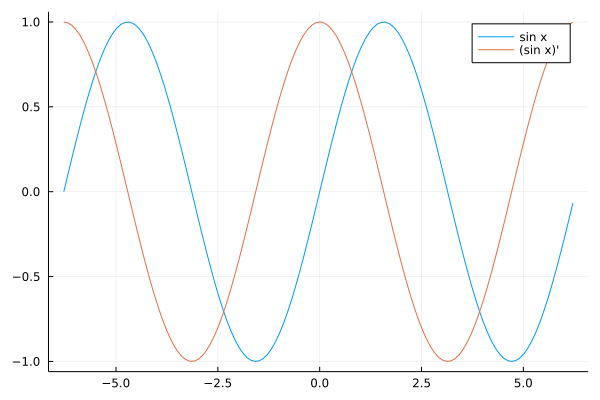

In [13]:
using Plots

# sin x の場合
x = -2pi:0.1:2pi

p = plot(x, sin, label="sin x")
plot!(p, x, cos, label="(sin x)'")

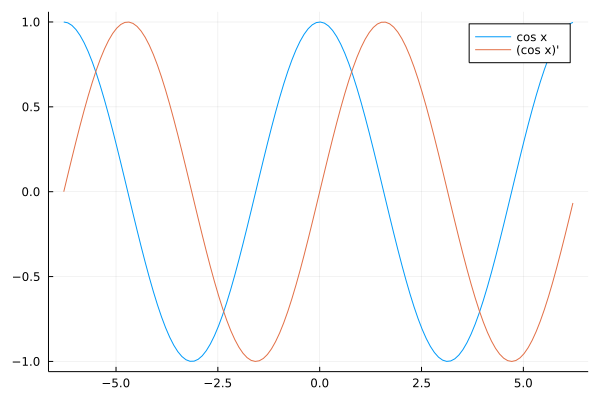

In [40]:
using Plots

# cos x の場合
x = -2pi:0.1:2pi

p = plot(x, cos, label="cos x")
plot!(p, x, sin, label="(cos x)'")

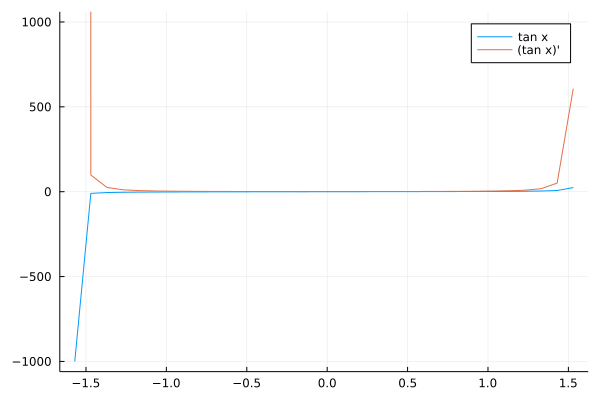

In [39]:
using Plots

# tan x の場合
x = - pi/2+0.001:0.1:pi/2

t_dash = x -> 1 / cos(x)^2

p = plot(x, tan, label="tan x", ylim=[-1000, 1000])
plot!(p, x, t_dash, label="(tan x)'")

### 対数関数の微分

対数関数は$f(x) = \log　x$でした。対数関数を微分すると

$$(\log x)' = \frac{1}{x}$$


In [50]:
using SymPy

x = symbols("x")
logx = log(x)

logx.diff(x)

1
─
x


これまた不思議な形ですね。右辺の$y = \frac{1}{x}$は中学校のときに習う「反比例」のグラフです。
グラフにしてみましょう。

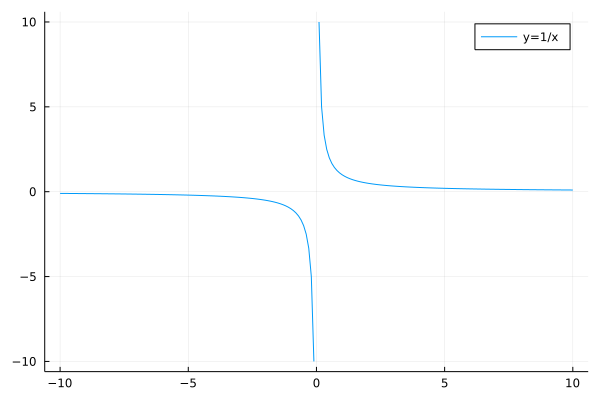

In [47]:
using Plots

f = x -> 1 /x
x = -10:0.1:10

plot(x, f, label="y=1/x")

$y = \frac(1){x}$ は _右側から_ $x=0$ に近づけると$\infty$に近づき、_左側から_ $x=0$ に近づけると $-\infty$ に発散します。

これが一般的に「0で割る」 $1/0 = \infty$ が _**間違いである**_　という理由です。近づけ方によって異なる場合は「解なし」とします。
（ただし、定義の仕方によっては解があるようにできます。）

と道筋にそれましたが、そもそも$f(x) = \log x$は定義域が$(0, \infty)$の部分は考えないため、導関数についても同じ定義域を指定します。
それを踏まえて可視化してみましょう。

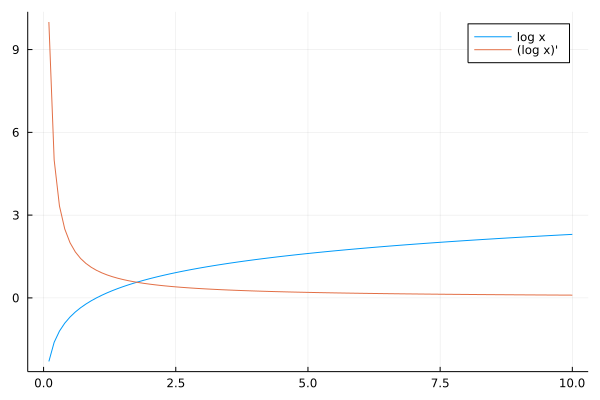

In [48]:
using Plots

log_dash = x -> 1 /x
x = 0:0.1:10

p = plot(x, log, label="log x")
plot!(p, x, log_dash, label="(log x)'")

$f(x) = \log x$は$x=0$に近いところでは急激に上昇していきますが、だんだんと上昇が緩やかになっています。
ですので導関数（瞬間の変化率）」としては、急激に小さくなっています。

しかしどうやら導関数は限りなく$0$ に近づいても$0$にはならなそうです。導関数が$0$にならない、しかも常にプラスの値をとり続けているということは、
元の関数は常に増加傾向にある、ということです。

こういった関数のことを単調増加関数野の中でも **狭義単調増加関数** といいます。ざっくりいえば「ずっと右肩上がりに上がり続ける関数」ということです。
単調増加関数には **広義単調増加関数** というものもあります。これはところどころで「一定の値になっても右肩上がりに上がり続ける」という関数です。

導関数が0にならない理由としては、上で描いた導関数のグラフである$y=\frac{1}{x}$のグラフからも類推できそうです。

###　指数関数の微分

指数関数とは $f(x) = a^x \quad(ただし a > 0 かつ a \neq 1)$のように変数が指数となっている関数をいいます。「指数関数的」という言葉はよく聞きますね（この定義をきちんといえるかどうかは定かではありませんが……）。

指数関数的でわかるとおり、指数関数は急激に伸びます。ですので導関数もものすごい勢いで大きくなることが予想されます。
指数関数の微分は次の通りです。

$$f'(x) = a^x \log a$$


In [56]:
using SymPy

a = 2.0
x = symbols("x")
e = a^x

println("a^xの微分は", e.diff(x))
println("log 2は", log(2))

a^xの微分は0.693147180559945*2.0^x
log 2は0.6931471805599453


少々複雑ですが、観察してみましょう。$f(x) = x^a$でしたので、元の$f(x)$ に　$\log a$をかけたのが導関数です。

$a$は単なる定数ですので、$x$の変動によって増えることはありません。aの条件は$a > 0 かつ a \neq 1$でしたので、少々強引ですが$0 < a < 1$と　$a > 1$の場合で見ていきます。

まずは$ 0 < a < 1 $の場合です。

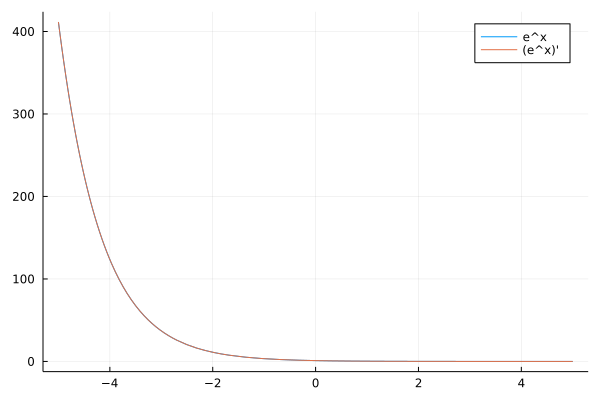

In [63]:
using Plots

a = 0.3
ex = x -> a^x
ex_dash = ex(x) * log(a)


p = plot(ex, label="e^x")
htplot!(p, ex, label="(e^x)'")

ほとんど重なっています。これは$log a$分の差しかないからですね。

また、徐々に小さくなっていっています。これは$0 < x < 1$は累乗すれば減少するからです。

In [70]:
using Printf

a = 0.3

for n=0:11
    @printf("n=%d のときは %6f\n",n, a^n)
end

n=0 のときは 1.000000
n=1 のときは 0.300000
n=2 のときは 0.090000
n=3 のときは 0.027000
n=4 のときは 0.008100
n=5 のときは 0.002430
n=6 のときは 0.000729
n=7 のときは 0.000219
n=8 のときは 0.000066
n=9 のときは 0.000020
n=10 のときは 0.000006
n=11 のときは 0.000002


一方で$a > 1$の場合はどうでしょうか。

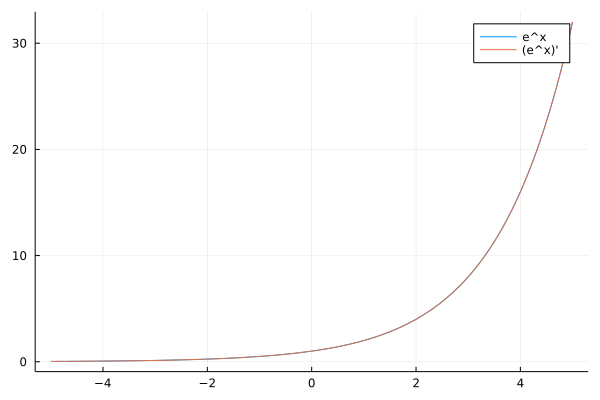

In [64]:
using Plots

a = 2
ex = x -> a^x
ex_dash = ex(x) * log(a)


p = plot(ex, label="e^x")
plot!(p, ex, label="(e^x)'")

こちらもほとんど重なっています。そして$0 < a < 1$のときとは異なり、増加傾向にあります。

「指数関数的に増える」というのは、「指数関数的に変化する」とするのが正しそうです。


また、これの特別な場合として、$a=e$の場合があります。
$e$とは対数関数の節で紹介したネイピア数と呼ばれる数でした。そちらの節では特に明示していない場合は$\log x$の底を$e$とするというように書いています。
つまり$\log a = \log_e a$というわけです。

これが$a=e$のときは$\log_e a = \log_e e = 1$となります（対数で紹介した言い方をすれば「eの1乗はe」）。 すなわち

$$
\begin{aligned}
(e^x)' &= e^x log e\\
       &= e^x \times 1\\
       &= e^x
\end{aligned}
$$

実は$a=e$の場合、導関数は元の関数と一致するという減少が起こります。書籍によっては単純に$(e^x)' = e^x$として紹介する場合も多いですが、
あくまでも指数関数の特別な場合という認識も持っていたほうがよさそうです。

ちなみにこのネイピア数の指数関数の微分は、機械学習の中でたくさんでてきます。一例としてはガウス分布（正規分布）は$e$の指数関数で表現します。
一応、紹介まで。


$\mu$を平均、$\sigma^2$を分散とするとき、正規分布$N(\mu, \sigma^2)$を

$$N(\mu, \sigma^2) = \frac{1}{\sqrt{2\pi\sigma^2}} e^{- \frac{(x - \mu)^2}{2 \sigma^2} } $$


どうみても複雑そうですが、そろそろ見慣れてきたかもしれません。